In [1]:
# %matplotlib inline
%time from hikyuu.interactive import *

from pylab import plot

Initialize hikyuu_2.6.6_202508081714_RELEASE_macosx_arm64 ...
2025-08-09 00:43:34.746 [HKU-I] - current python version: 3.12.7 (main.cpp:68)


2025-08-09 00:43:35,275 [INFO] runing in interactive session [<module>] (/Users/fasiondog/workspace/hikyuu/hikyuu/__init__.py:109) [hikyuu::hku_info]
2025-08-09 00:43:35,275 [INFO] running in jupyter [<module>] (/Users/fasiondog/workspace/hikyuu/hikyuu/__init__.py:116) [hikyuu::hku_info]


current plugin path: /Users/fasiondog/.hikyuu/plugin
2025-08-09 00:43:36.526 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-08-09 00:43:36.534 [HKU-I] - 加载市场信息…… (StockManager.cpp:576)
2025-08-09 00:43:36.535 [HKU-I] - 加载证券类型信息…… (StockManager.cpp:594)
2025-08-09 00:43:36.535 [HKU-I] - 加载证券信息…… (StockManager.cpp:480)
2025-08-09 00:43:36.594 [HKU-I] - 加载权息数据…… (StockManager.cpp:612)
2025-08-09 00:43:36.703 [HKU-I] - 加载板块信息…… (StockManager.cpp:185)
2025-08-09 00:43:36.898 [HKU-I] - 加载K线数据…… (StockManager.cpp:189)
2025-08-09 00:43:36.899 [HKU-I] - 预加载 day K线数据至缓存 (最大数量: 100000)! (StockManager.cpp:233)
2025-08-09 00:43:36.899 [HKU-I] - 0.37 秒数据加载完毕. (StockManager.cpp:195)
2025-08-09 00:43:36.899 [HKU-I] - 启动行情接收. (SpotAgent.cpp:38)
CPU times: user 527 ms, sys: 127 ms, total: 655 ms
Wall time: 2.26 s


# 示例：通道突破系统

当价格突破20日高点时买入，当价格低于10日低点时卖出。

In [2]:
#创建一个从2001年1月1日开始的账户，初始资金20万元
my_tm = crtTM(Datetime(200101010000), 200000)

In [3]:
my_sys = SYS_Simple(tm=my_tm)

In [4]:
def TurtleSG(self, k):
     n1 = self.get_param("n1")
     n2 = self.get_param("n2")
     c = CLOSE(k)
     h = REF(HHV(c, n1), 1) #前n日高点
     L = REF(LLV(c, n2), 1) #前n日低点
     for i in range(h.discard, len(k)):
         if (c[i] >= h[i]):
             self._add_buy_signal(k[i].datetime)
         elif (c[i] <= L[i]):
             self._add_sell_signal(k[i].datetime)

In [5]:
my_sg = crtSG(TurtleSG, {'n1': 20, 'n2': 10}, 'TurtleSG')

my_mm = MM_Nothing()

s = sm['sz000001']
query = Query(Datetime(200101010000), Datetime(201705010000))

my_sys.mm = my_mm
my_sys.sg = my_sg
my_sys.run(s, query)

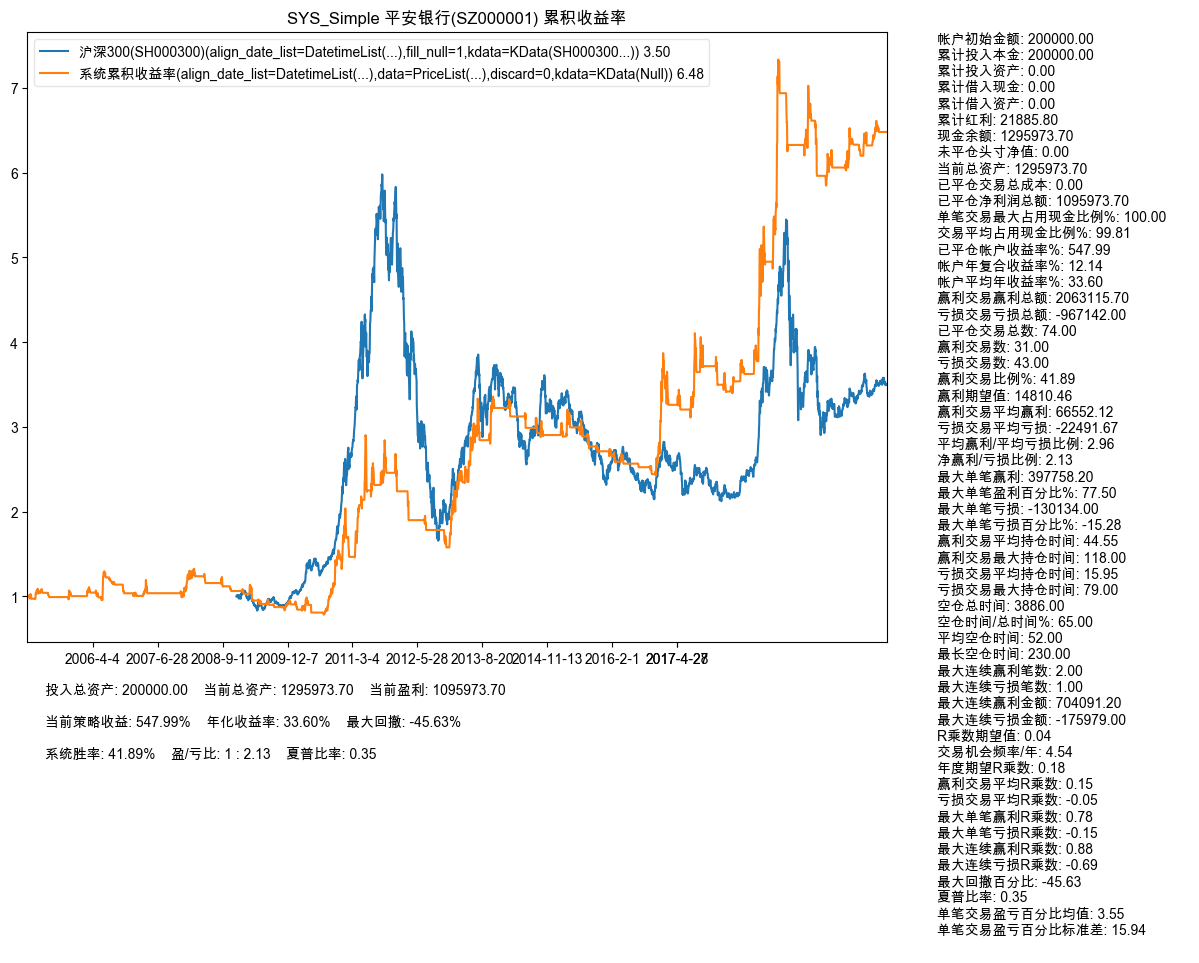

In [6]:
my_sys.performance()

In [7]:
per = my_sys.tm.get_performance(Datetime(datetime.today()))
print(per.report())

帐户初始金额: 200000.00
累计投入本金: 200000.00
累计投入资产: 0.00
累计借入现金: 0.00
累计借入资产: 0.00
累计红利: 21885.80
现金余额: 1295973.70
未平仓头寸净值: 0.00
当前总资产: 1295973.70
已平仓交易总成本: 0.00
已平仓净利润总额: 1095973.70
单笔交易最大占用现金比例%: 100.00
交易平均占用现金比例%: 99.81
已平仓帐户收益率%: 547.99
帐户年复合收益率%: 7.89
帐户平均年收益率%: 22.28
赢利交易赢利总额: 2063115.70
亏损交易亏损总额: -967142.00
已平仓交易总数: 74.00
赢利交易数: 31.00
亏损交易数: 43.00
赢利交易比例%: 41.89
赢利期望值: 14810.46
赢利交易平均赢利: 66552.12
亏损交易平均亏损: -22491.67
平均赢利/平均亏损比例: 2.96
净赢利/亏损比例: 2.13
最大单笔赢利: 397758.20
最大单笔盈利百分比%: 77.50
最大单笔亏损: -130134.00
最大单笔亏损百分比%: -15.28
赢利交易平均持仓时间: 44.55
赢利交易最大持仓时间: 118.00
亏损交易平均持仓时间: 15.95
亏损交易最大持仓时间: 79.00
空仓总时间: 6911.00
空仓时间/总时间%: 76.00
平均空仓时间: 93.00
最长空仓时间: 3074.00
最大连续赢利笔数: 2.00
最大连续亏损笔数: 1.00
最大连续赢利金额: 704091.20
最大连续亏损金额: -175979.00
R乘数期望值: 0.04
交易机会频率/年: 3.01
年度期望R乘数: 0.12
赢利交易平均R乘数: 0.15
亏损交易平均R乘数: -0.05
最大单笔赢利R乘数: 0.78
最大单笔亏损R乘数: -0.15
最大连续赢利R乘数: 0.88
最大连续亏损R乘数: -0.69
最大回撤百分比: -45.63
夏普比率: 0.30
单笔交易盈亏百分比均值: 3.55
单笔交易盈亏百分比标准差: 15.94



In [8]:
calendar = sm.get_trading_calendar(query, 'SZ')
# calendar

In [9]:
x1 = my_tm.get_funds_curve(calendar, Query.DAY)

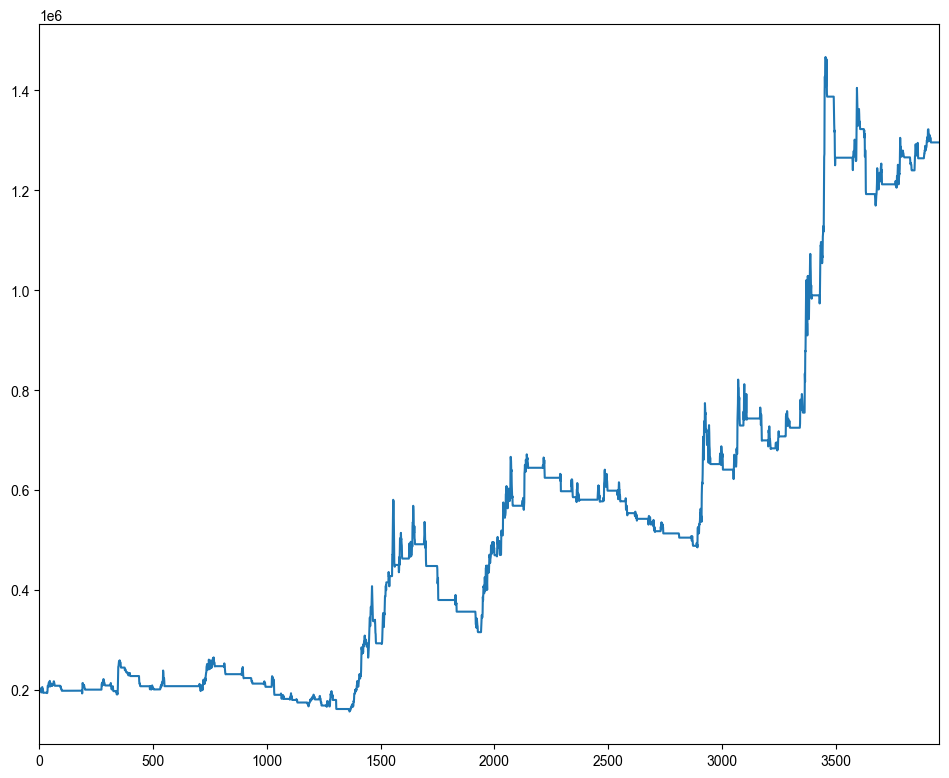

In [10]:
PRICELIST(x1).plot()

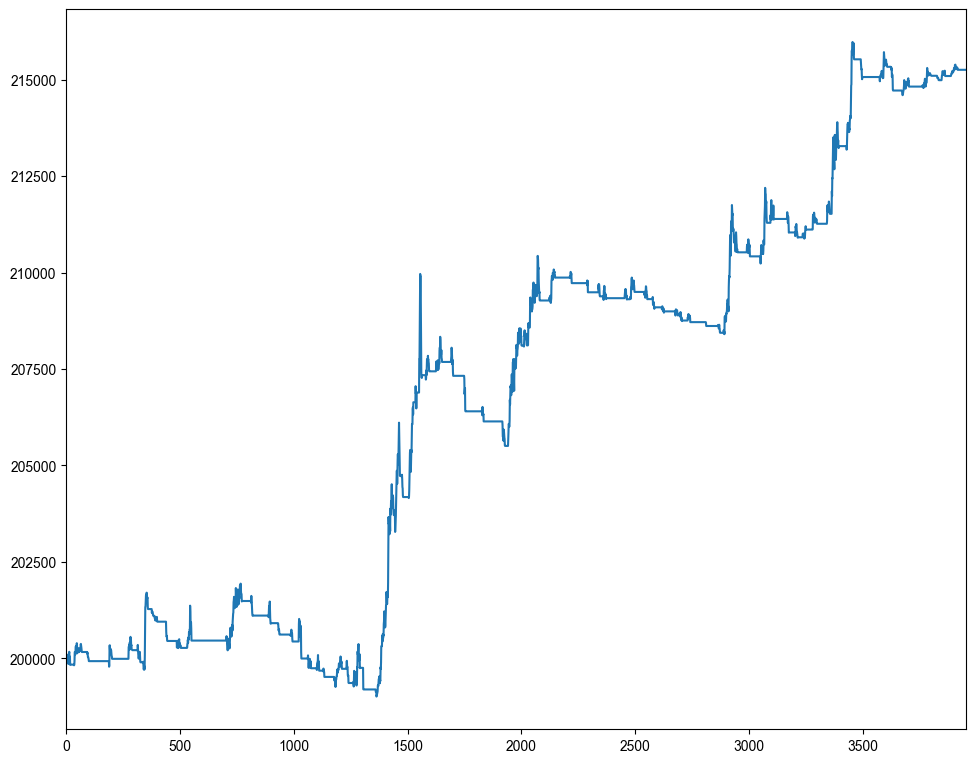

In [11]:
my_sys.mm = MM_FixedPercent(0.03)
my_sys.run(s, query)

x2 = my_tm.get_funds_curve(calendar, Query.DAY)
PRICELIST(x2).plot()

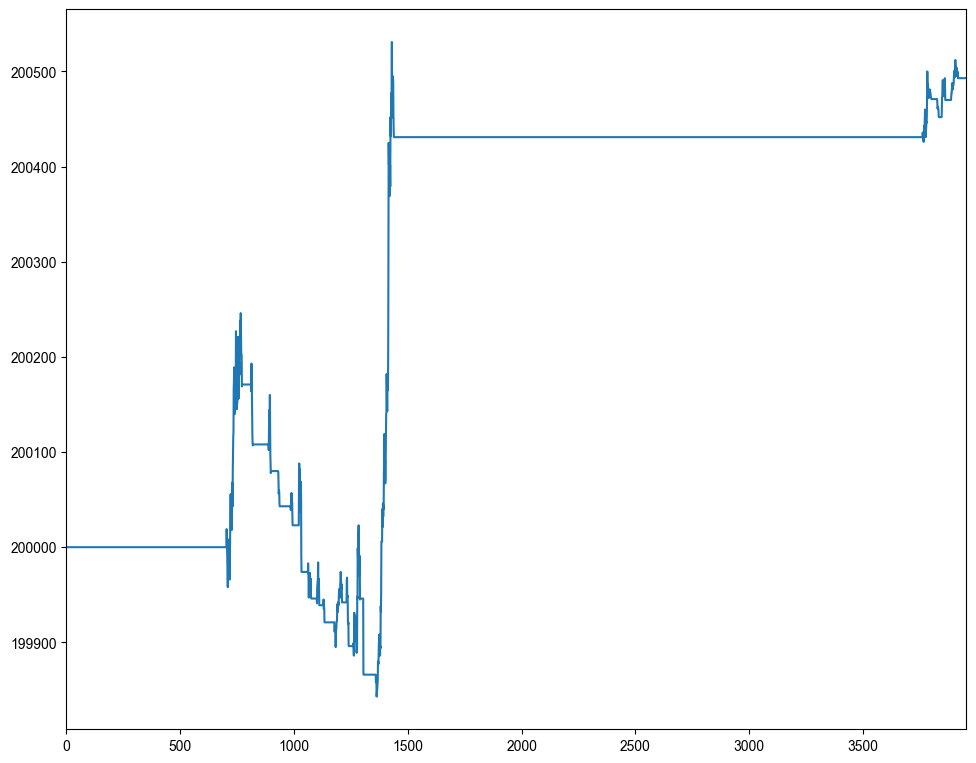

In [12]:
my_sys.mm = MM_FixedRisk(1000)
my_sys.run(s, query)

x3 = my_tm.get_funds_curve(calendar, Query.DAY)
PRICELIST(x3).plot()

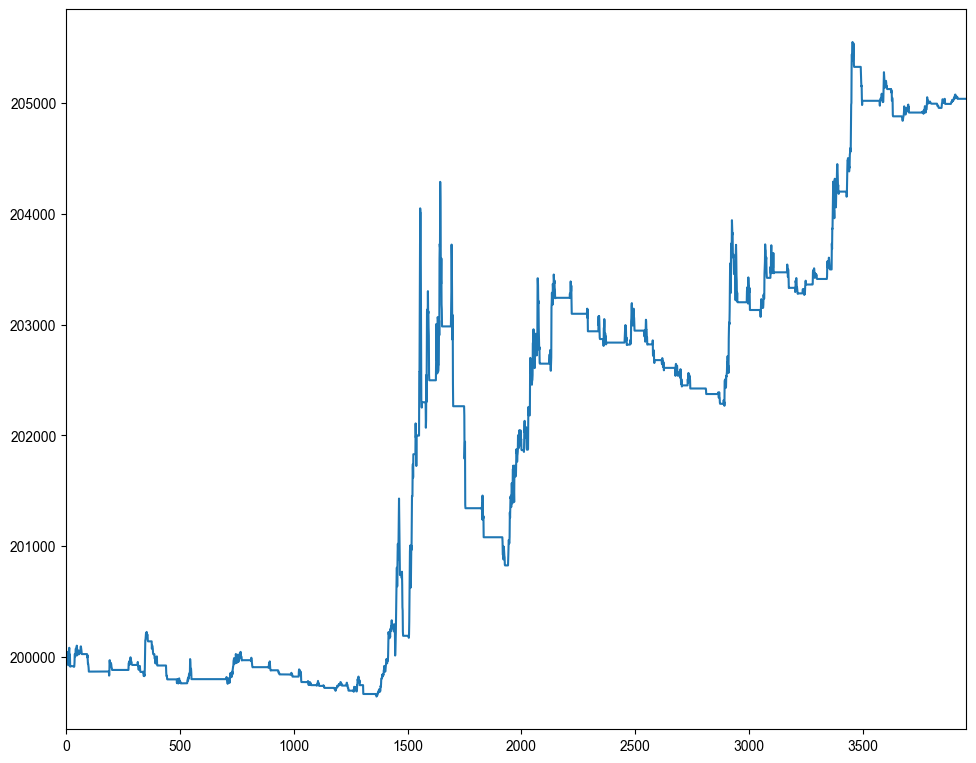

In [13]:
my_sys.mm = MM_FixedCapital(1000)
my_sys.run(s, query)

x4 = my_tm.get_funds_curve(calendar, Query.DAY)
PRICELIST(x4).plot()

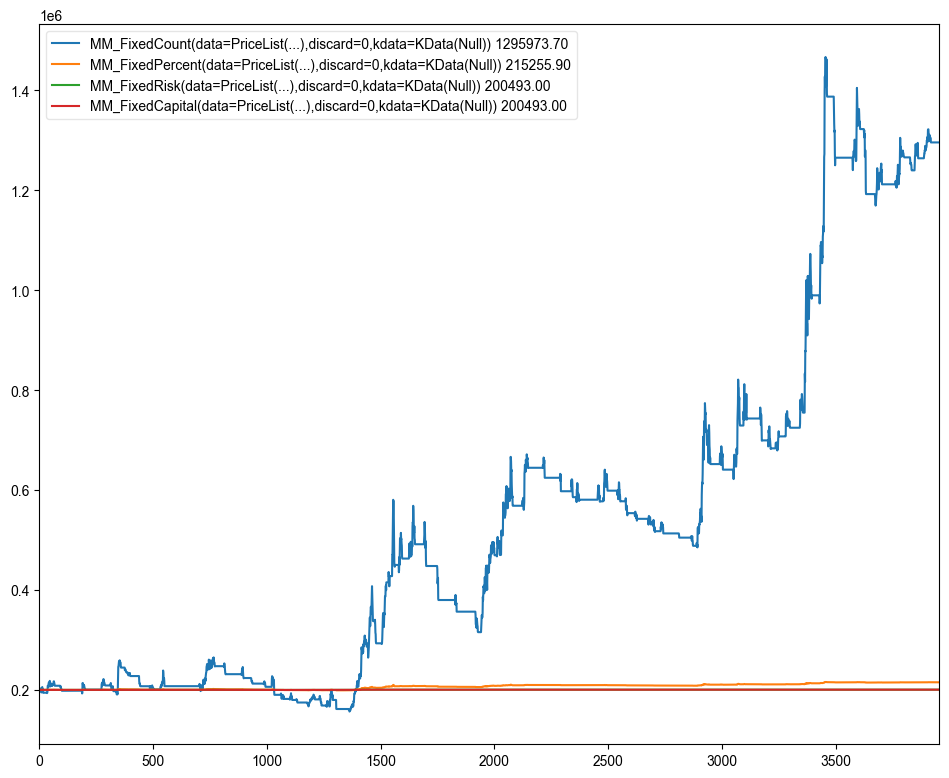

In [14]:
ax = create_figure(1)

def x_plot(x, name, ax):
    px = PRICELIST(x)
    px.name = name
    px.plot(axes=ax, legend_on=True)

x_plot(x1, 'MM_FixedCount', ax)
x_plot(x2, 'MM_FixedPercent', ax)
x_plot(x3, 'MM_FixedRisk', ax)
x_plot(x3, 'MM_FixedCapital', ax)